In [1]:
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, coint
import pandas as pd
import pandas_datareader as pdr
import datetime
import yfinance as y
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('price_data.csv')
data = data.dropna(axis=1)
data = data.set_index('Date')
data

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,169.570587,49.574783,40.227276,52.064758,135.800003,113.976517,55.406631,35.834545,138.860001,89.491692,...,22.682571,140.679993,117.038406,40.952621,49.253613,65.414474,103.680000,110.162346,36.274277,58.624699
2017-05-23,168.904312,49.823303,40.181274,52.383003,134.740005,113.456375,56.066227,37.164307,139.520004,89.563683,...,22.870089,141.220001,116.093941,41.138371,49.924950,65.331566,102.279999,110.181030,37.293663,59.713402
2017-05-24,168.699326,49.970570,40.043278,52.454613,134.899994,113.270592,56.754932,36.741196,141.119995,89.968620,...,22.712570,142.759995,115.953659,41.368340,49.745296,66.280403,104.410004,111.387512,36.716320,60.559078
2017-05-25,170.450455,50.163860,40.429642,52.764889,135.880005,114.338753,57.443638,36.801643,142.850006,91.030449,...,22.397539,144.800003,116.365112,41.801743,49.291447,66.446220,106.300003,111.574562,36.878696,60.831261
2017-05-26,171.415695,49.768082,41.128765,52.558029,138.589996,114.143707,56.531837,36.654846,141.889999,91.201447,...,22.270025,145.000000,117.571426,41.837128,48.610649,66.409363,105.919998,111.509102,36.490780,60.860428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,148.994293,58.980000,109.709999,155.470001,253.789993,286.170013,78.000000,86.779999,402.859985,208.600006,...,35.439999,204.250000,63.939999,74.830002,81.800003,112.180000,329.329987,115.120003,52.930000,165.500000
2022-05-17,150.815887,60.349998,114.540001,154.779999,258.230011,291.070007,78.540001,88.629997,409.649994,214.960007,...,35.900002,207.210007,66.400002,75.300003,84.040001,112.470001,344.579987,119.379997,54.900002,166.429993
2022-05-18,147.439987,57.770000,112.739998,152.429993,240.460007,274.160004,77.919998,84.540001,397.880005,208.500000,...,35.230000,202.919998,62.820000,74.889999,80.959999,109.459999,326.420013,116.449997,53.000000,158.860001


In [2]:
adf = []
ticker = data.columns
stationary = []

for i in range(len(data.columns)):
    if adfuller(data[ticker[i]])[1] > 0.05:
        # print(ticker[i],'is non-stationary')
        adf.append(ticker[i])
    else:
        stationary.append(ticker[i])

print(stationary)
print(len(stationary))


['BDX', 'CAH', 'EIX', 'GE', 'GILD', 'GL', 'HAS', 'INCY', 'IBM', 'IFF', 'NWL', 'PNW', 'PPL', 'WBD']
14


In [3]:
tickers = stationary

df = pdr.get_data_yahoo(tickers, start='2017-05-22', end='2022-05-20')['Adj Close']
df.tail()

Symbols,BDX,CAH,EIX,GE,GILD,GL,HAS,INCY,IBM,IFF,NWL,PNW,PPL,WBD
Date,,,,,,,,,,,,,,
2022-05-16,252.889999,56.139999,66.589996,74.629997,62.240002,96.269997,91.199997,74.510002,135.029999,127.959999,22.345036,73.730003,28.980000,17.209999
2022-05-17,256.260010,56.700001,66.660004,76.400002,63.180000,98.279999,92.559998,75.510002,138.369995,129.830002,22.819830,74.529999,29.389999,18.360001
2022-05-18,251.100006,55.680000,65.830002,75.199997,63.220001,95.809998,90.730003,73.389999,132.940002,126.949997,20.445856,74.540001,29.370001,17.459999
2022-05-19,251.139999,55.830002,65.849998,75.739998,63.270000,93.879997,86.760002,74.339996,129.660004,129.009995,19.456699,75.529999,29.209999,17.500000
2022-05-20,252.300003,55.799999,65.849998,75.250000,63.840000,93.559998,84.699997,74.879997,128.479996,128.929993,19.239086,75.309998,29.200001,17.740000


In [4]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('BDX', 'GE'), ('BDX', 'GL'), ('BDX', 'INCY'), ('BDX', 'IBM'), ('BDX', 'NWL'), ('BDX', 'PNW'), ('CAH', 'GE'), ('CAH', 'IBM'), ('CAH', 'NWL'), ('CAH', 'PNW'), ('EIX', 'IBM'), ('EIX', 'NWL'), ('EIX', 'PPL'), ('GE', 'IFF'), ('GE', 'NWL'), ('GILD', 'GL'), ('GILD', 'HAS'), ('GILD', 'INCY'), ('GILD', 'IBM'), ('GILD', 'IFF'), ('GILD', 'NWL'), ('GILD', 'PNW'), ('GILD', 'PPL'), ('GILD', 'WBD'), ('GL', 'INCY'), ('GL', 'IBM'), ('HAS', 'IBM'), ('HAS', 'PPL'), ('HAS', 'WBD'), ('IBM', 'IFF'), ('IBM', 'NWL'), ('IBM', 'PNW'), ('IBM', 'PPL'), ('IBM', 'WBD'), ('IFF', 'NWL'), ('IFF', 'PNW'), ('IFF', 'PPL'), ('NWL', 'WBD'), ('PNW', 'WBD')]
39


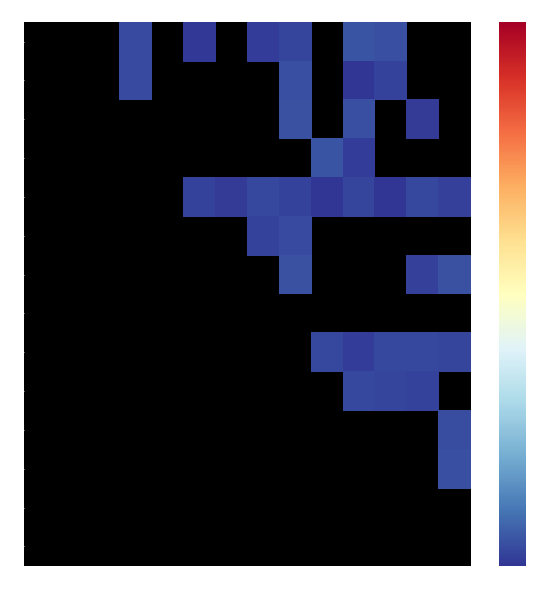

In [5]:
scores, pvalues, pairs = find_cointegrated_pairs(df)

fig, ax = plt.subplots(figsize=(10,10))
pvalue_plot = sns.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlBu_r', mask = (pvalues >= 0.05))
pvalue_plot.set_title('P-value Heatmap')

print(pairs)
print(len(pairs))



In [6]:
S1_name = 'GILD'
S2_name = 'PNW'

S1 = df[S1_name]
S2 = df[S2_name]

score, pvalue, _ = coint(S1, S2)
pvalue

0.002572050239292334

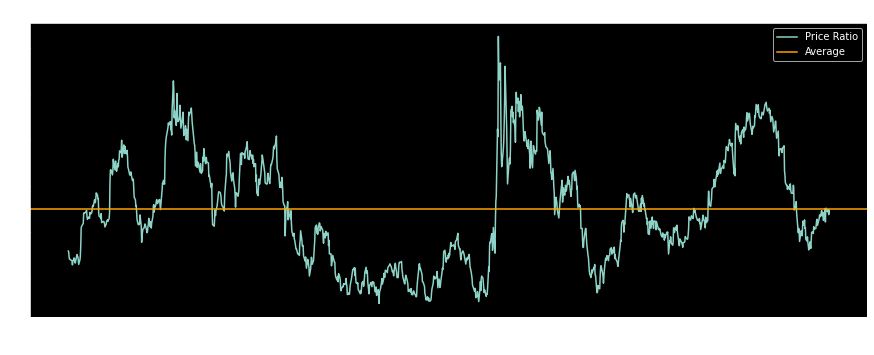

In [7]:
ratio = S1/S2
ratio.plot(figsize=(15,6))
plt.axhline(ratio.mean(), color='orange')
plt.legend(['Price Ratio','Average'])
plt.title(f'{S1_name} & {S2_name} Price Ratio')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

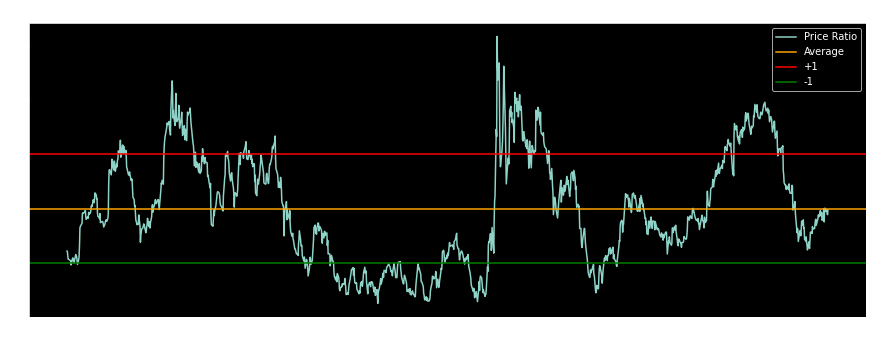

In [8]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

zscore(ratio).plot(figsize=(15,6))
plt.axhline(zscore(ratio).mean(), color='orange')
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.legend(['Price Ratio','Average','+1','-1'])
plt.title(f'{S1_name} & {S2_name} Price Ratio')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

In [9]:
ratios = S1 / S2 
sep = int(len(ratios) * 0.70)
print(sep) 

882


In [10]:
train = ratios[:sep]
test = ratios[sep:]

In [11]:
train.head()

Date
2017-05-22    0.758575
2017-05-23    0.756864
2017-05-24    0.746673
2017-05-25    0.740834
2017-05-26    0.740654
dtype: float64

In [12]:
test.head()

Date
2020-11-19    0.726666
2020-11-20    0.723030
2020-11-23    0.709895
2020-11-24    0.703339
2020-11-25    0.688643
dtype: float64

# Train data

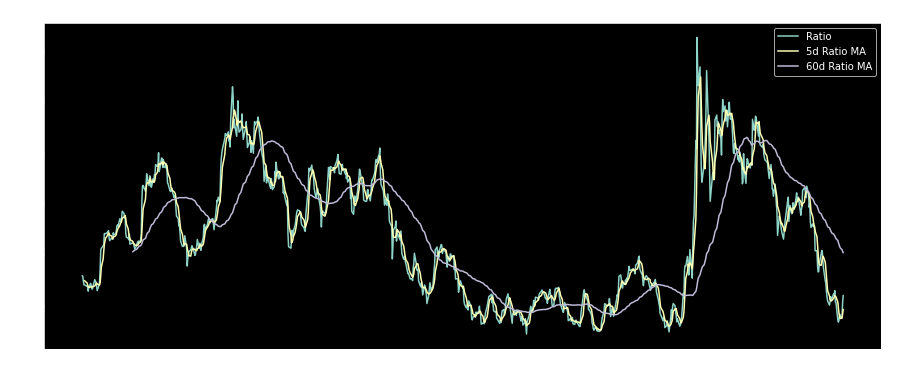

In [13]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

plt.figure(figsize=(15, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
plt.title(f'{S1_name} & {S2_name} Price Ratio in Train Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.ylabel('Ratio')
plt.show()

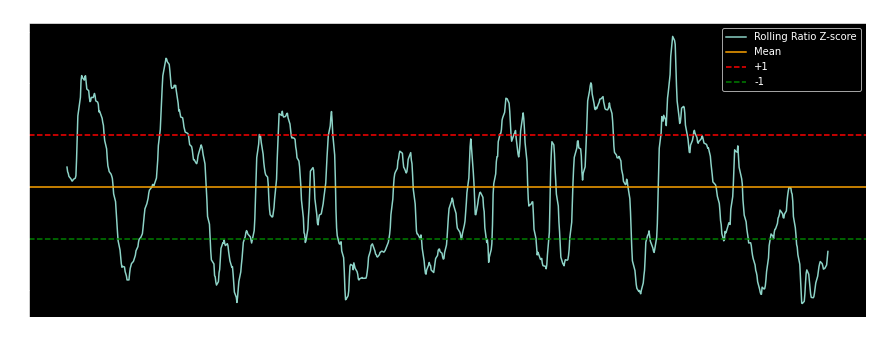

In [14]:
plt.figure(figsize=(15,6))
zscore_60_5.plot()
plt.axhline(0, color='orange')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio Z-score', 'Mean', '+1', '-1'])
plt.title(f'{S1_name} & {S2_name} Roiing Ratio Z-score in Train Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

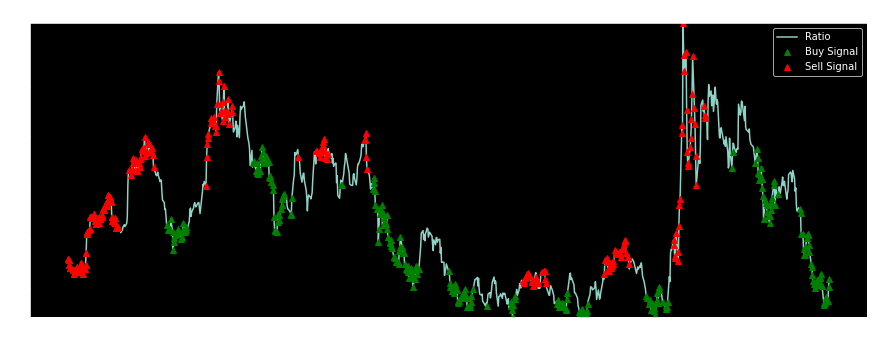

In [15]:
plt.figure(figsize=(15,6))

train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))

plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title(f'{S1_name} & {S2_name} Price Ratio and Trading Signals in Train Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

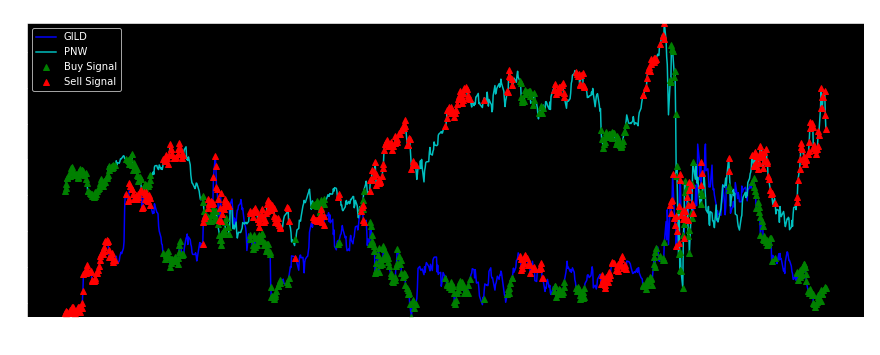

In [16]:
plt.figure(figsize=(15,6))
S1 = S1.iloc[:sep]
S2 = S2.iloc[:sep]

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))

plt.legend([S1_name, S2_name, 'Buy Signal', 'Sell Signal'])
plt.title(f'{S1_name} & {S2_name} Stock Price and Trading Signals in Train Data')
plt.xticks(rotation=0, horizontalalignment='center')

plt.show()

In [29]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0 #money is cash-flow
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Buy long if the z-score is < -1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Sell short if the z-score is > 1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
             
    return money

In [18]:
trade(S1, S2, 60, 5)

1824.0778419662963

# Test Data

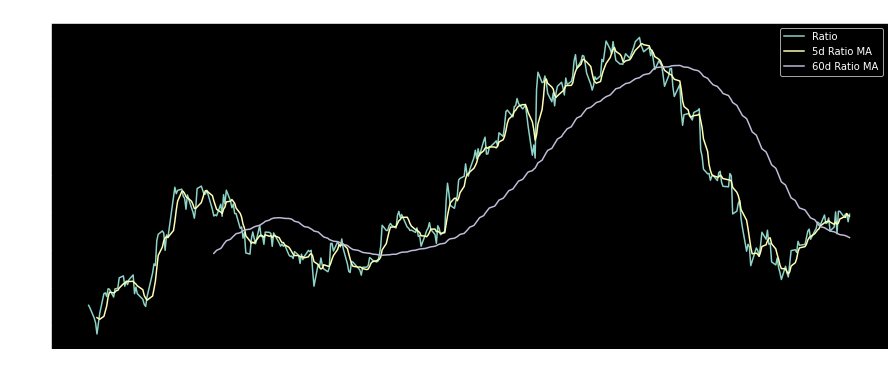

In [19]:
ratios_mavg5 = test.rolling(window=5, center=False).mean()
ratios_mavg60 = test.rolling(window=60, center=False).mean()
std_60 = test.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15, 6))
plt.plot(test.index, test.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
plt.title(f'{S1_name} & {S2_name} Price Ratio in Test Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.ylabel('Ratio')
plt.show()

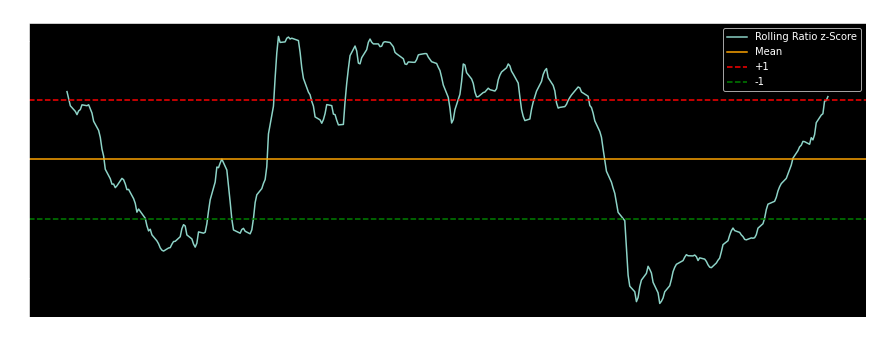

In [20]:
plt.figure(figsize=(15,6))
zscore_60_5.plot()

plt.axhline(0, color='orange')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.title(f'{S1_name} & {S2_name} Rolling Ratio Z-score in Test Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

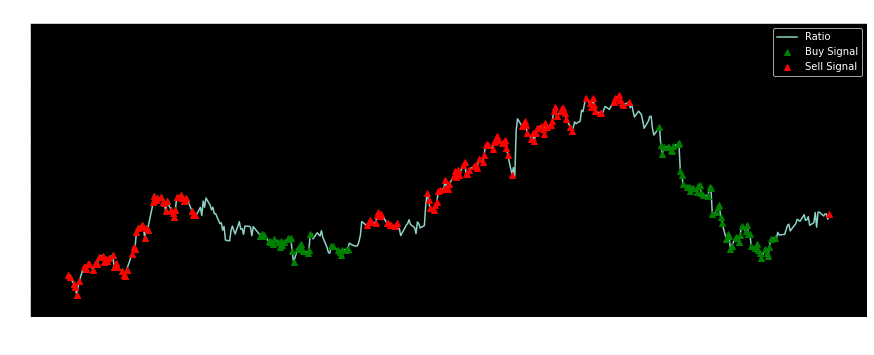

In [21]:
plt.figure(figsize=(15,6))

test.plot()
buy = test.copy()
sell = test.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0

buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title(f'{S1_name} & {S2_name} Price Ratio and Trading Signals in Test Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

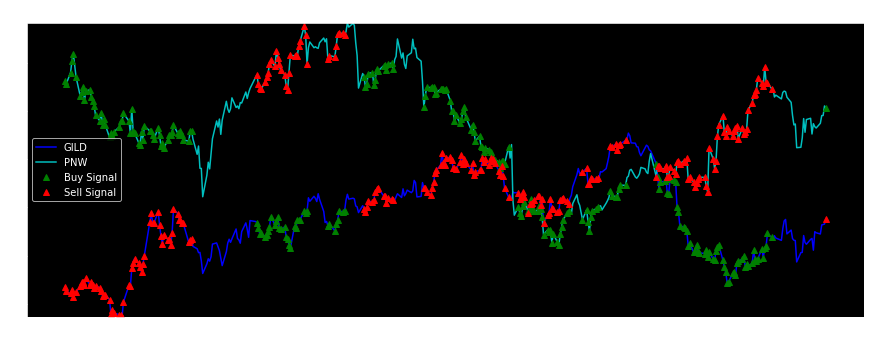

In [22]:
S1 = df[S1_name]
S2 = df[S2_name]

plt.figure(figsize=(15,6))
S1 = S1.iloc[sep:]
S2 = S2.iloc[sep:]

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
# plt.ylim(25, 105)
# plt.xlim('2013-03-22', '2016-07-04')

plt.legend([S1_name, S2_name, 'Buy Signal', 'Sell Signal'])
plt.title(f'{S1_name} & {S2_name} Stock Price and Trading Signals in Test Data')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

In [30]:
trade(S1, S2, 60, 5)

0.0
0.0
0.0
0.0
0.0
7.105427357601002e-15
7.105427357601002e-15
0.0
0.0
-7.105427357601002e-15
-1.4210854715202004e-14
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
32.66764494087203
32.66764494087203
32.66764494087202
32.667644940872016
32.66764494087202
32.66764494087202
32.66764494087203
32.66764494087204
32.66764494087204
32.66764494087204
32.667644940872044
32.667644940872044
32.667644940872044
32.667644940872044
32.667644940872044
32.667644940872044
32.66764494087204
32.66764494087204
32.66764494087204
32.66764494087204
32.66764494087204
32.66764494087204
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087202
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764494087203
32.66764

-716.9521962470274

In [24]:
final_result = []
train_list_rt = []
test_list_rt = []

for i in range(len(pairs)):
    result = []
    train_rt = trade(df[pairs[i][0]].iloc[:sep], df[pairs[i][1]].iloc[:sep], 60, 5)
    test_rt = trade(df[pairs[i][0]].iloc[sep:], df[pairs[i][1]].iloc[sep:], 60, 5)
    
    result.append(pairs[i])
    result.append(train_rt)
    result.append(test_rt)
    
    train_list_rt.append(train_rt)
    test_list_rt.append(test_rt)
    
    final_result.append(result)
    
    print(result)
    
print('Train:','Positive:',sum(i > 0 for i in train_list_rt),'; Negative:', sum(i < 0 for i in train_list_rt))
print('Test:','Positive:',sum(i > 0 for i in test_list_rt),'; Negative:', sum(i < 0 for i in test_list_rt))


[('BDX', 'GE'), 3400.629044524765, 1598.4276917955576]
[('BDX', 'GL'), 5930.383506175683, 3450.6463314148937]
[('BDX', 'INCY'), 2918.764767388853, 1776.4146641029638]
[('BDX', 'IBM'), 4963.785329340701, 2453.144568703015]
[('BDX', 'NWL'), 556.3149401387852, 1321.1174682688873]
[('BDX', 'PNW'), 4498.964555717595, -1132.0963407095837]
[('CAH', 'GE'), -19.814411321839337, 418.54862834991604]
[('CAH', 'IBM'), 619.6868731546973, 681.5251894025134]
[('CAH', 'NWL'), 52.250078211197376, 752.1337349427967]
[('CAH', 'PNW'), 1188.7868596006685, 530.0691716964584]
[('EIX', 'IBM'), 1410.049366430355, 734.5035281764425]
[('EIX', 'NWL'), 287.71649385449734, 75.93053139201027]
[('EIX', 'PPL'), 1281.5519837180927, 495.7027536259801]
[('GE', 'IFF'), -1630.3478307794505, 1100.8039975790493]
[('GE', 'NWL'), 2231.3897101339026, 921.7820969838349]
[('GILD', 'GL'), 937.7454986470085, 395.45605361265234]
[('GILD', 'HAS'), 1936.1965279365857, 637.4539296323378]
[('GILD', 'INCY'), 879.0475644807395, 110.8585017

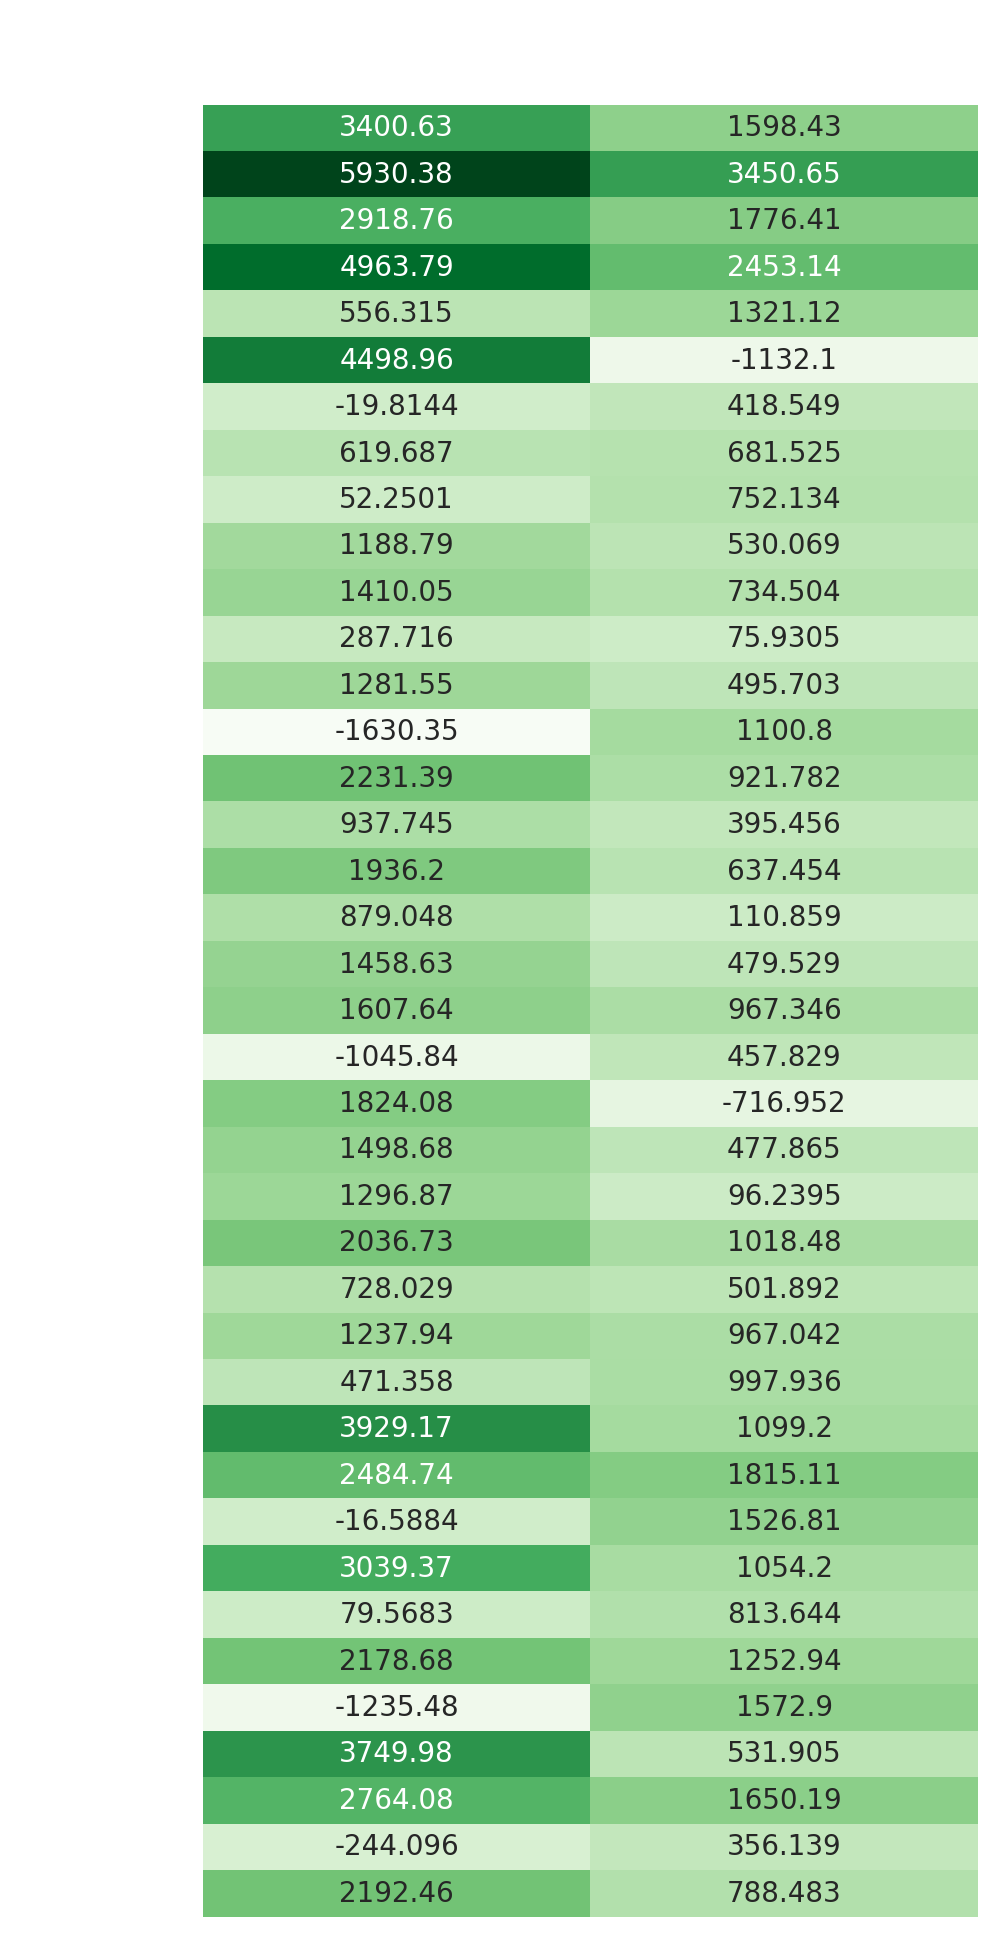

In [25]:
final_df = pd.DataFrame()

final_df['Pair'] = pairs
final_df['Train Profit'] = train_list_rt
final_df['Test Profit'] = test_list_rt
final_df.set_index("Pair" , inplace=True)
final_df

plt.figure(dpi=200, figsize=(5,12))
sns.heatmap(final_df, annot=True, cmap=plt.get_cmap('Greens'), cbar=False, fmt='2g').set(title='Strategy Profit and Loss')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel("")
plt.show()

